<a href="https://colab.research.google.com/github/jennake/Astro100-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astropy --upgrade
!pip install photutils

import numpy as np
import math
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import glob
import warnings
warnings.filterwarnings("ignore")
from matplotlib.gridspec import GridSpec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.5 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os

Mounted at /content/drive


In [ ]:
import glob
dir = 'drive/MyDrive/ASTRO 100/FAST/2025.0318'
fast1 = glob.glob(dir+"/0067.NGC4038.fits")
fast2 = glob.glob(dir+"/0065.NGC4038.fits")
fast3 = glob.glob(dir+"/0064.NGC4038.fits")

In [ ]:
fast_1 = fits.open(fast1[0])
fast_1.info()

Filename: drive/MyDrive/ASTRO 100/FAST/2025.0318/0067.NGC4038.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      74   (2720, 161)   int16 (rescales to uint16)   


In [ ]:
fast_1[0].header

SIMPLE  =                    T / Primary FITS image array                       
BITPIX  =                   16                                                  
NAXIS   =                    2 / NUMBER OF AXES                                 
NAXIS1  =                 2720 / CHIP WIDTH                                     
NAXIS2  =                  161 / CHIP HEIGHT                                    
EXTEND  =                    F / Fits standard                                  
OBJECT  = 'NGC4038           ' / OBJECT NAME                                    
NAMPS   =                    1                                                  
DATE    = '2025-03-19T07:25:16' / UT date/time at start                         
DATE-OBS= '2025-03-19        ' / UT date/time at start                          
RA      = '12:01:53.002      ' / RA                                             
DEC     = '-18:52:03.32      ' / DEC                                            
EPOCH   = '2000             

In [ ]:
dir2 = 'drive/MyDrive/ASTRO 100/KeplerCam/2025.0318'
kep_files = glob.glob(dir2+"/0086.NGC4472.fits")

SIMPLE  =                    T / Primary FITS image array                       
BITPIX  =                   16                                                  
NAXIS   =                    0                                                  
EXTEND  =                    T / Fits standard                                  
OBJECT  = 'NGC4472           ' / OBJECT NAME                                    
RA      = '12:29:46.8        ' / RA                                             
DEC     = '08:00:01          ' / DEC                                            
EPOCH   = '2000              ' / EPOCH                                          
AIR     = '1.10              ' / AIR MASS                                       
RRA     = '12:29:46.8        ' / RRA                                            
RDEC    = '08:00:01          ' / RDEC                                           
REPOCH  = '2000              ' / TEPOCH                                         
TRA     = '12:29:16.1       

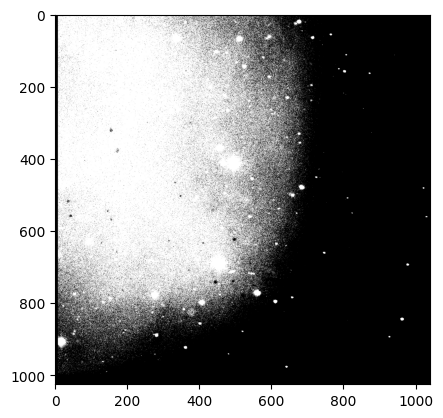

In [ ]:
dir2 = 'drive/MyDrive/ASTRO 100/KeplerCam/2025.0318'
science_kep = glob.glob(dir2+"/0086.NGC4472.fits")

#science_V = glob.glob(dir+"/0036.M67.fits")
science_fits = fits.getdata(science_kep[0])
plt.imshow(science_fits, cmap="grey", vmax=np.percentile(science_fits,70), vmin=np.percentile(science_fits,50))

fits.getheader(science_kep[0])

In [20]:
dir3 = '/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/'
bias_list = glob.glob(dir3+"/*BIAS.fits")
print(bias_list)

['/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0002.BIAS.fits', '/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0166.BIAS.fits', '/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0164.BIAS.fits', '/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0224.BIAS.fits', '/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0161.BIAS.fits', '/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0003.BIAS.fits', '/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0160.BIAS.fits', '/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0004.BIAS.fits']


In [10]:
/content/drive/MyDrive/ASTRO 100/Ast100_Data/Final_Projects_2025/KeplerCam/2025.0318/0002.BIAS.fits

(1025, 1040)

In [32]:
def master_bias(data_array_full):
  for i in range(len(bias_list))[:10]:
    data = fits.getdata(bias_list[i], 1)
    data_array_full.append(data[None])

  data_array_full_1 = []
  data_array_full_2 = []
  data_array_full_3 = []
  data_array_full_4 = []


  for i, fn in enumerate(bias_list[:20]):
      data1 = fits.getdata(fn, 1)
      data_array_full_1.append(data1[None])

      data2 = fits.getdata(fn, 2)
      data_array_full_2.append(data2[None])

      data3 = fits.getdata(fn, 3)
      data_array_full_3.append(data3[None])

      data4 = fits.getdata(fn, 4)
      data_array_full_4.append(data4[None])

  data_array_full_1 = np.concatenate(data_array_full_1, axis = 0)
  master_bias_1 = np.median(data_array_full_1, axis = 0)

  data_array_full_2 = np.concatenate(data_array_full_2, axis = 0)
  master_bias_2 = np.median(data_array_full_2, axis = 0)

  data_array_full_3 = np.concatenate(data_array_full_3, axis = 0)
  master_bias_3 = np.median(data_array_full_3, axis = 0)

  data_array_full_4 = np.concatenate(data_array_full_4, axis = 0)
  master_bias_4 = np.median(data_array_full_4, axis = 0)

  return master_bias_1, master_bias_2, master_bias_3, master_bias_4

In [31]:
rflat_list = glob.glob(dir3+"/*FLATr.fits") # Use this
iflat_list = glob.glob(dir3+"/*FLATi.fits")
gflat_list = glob.glob(dir3+"/*FLATg.fits")

In [33]:
def master_flat(f, master_bias):

""" f will be our flat list of flat images in certain filter (e.g. r), and master_bias is
the output of the master_bias function, so an array of the master bias.
"""

  data_array_flat_1 = []
  data_array_flat_2 = []
  data_array_flat_3 = []
  data_array_flat_4 = []

  for fn in f:
    header = fits.getheader(fn)
    for i, fn in enumerate(f[:20]):
      data1 = fits.getdata(fn, 1)
      data1 = data1 - master_bias[0]
      data_array_flat_1.append(data1[None])

      data2 = fits.getdata(fn, 2)
      data2 = data2 - master_bias[1]
      data_array_flat_2.append(data2[None])

      data3 = fits.getdata(fn, 3)
      data3 = data3 - master_bias[2]
      data_array_flat_3.append(data3[None])

      data4 = fits.getdata(fn, 4)
      data4 = data4 - master_bias[3]
      data_array_flat_4.append(data4[None])

    data_array_flat_1 = np.concatenate(data_array_flat_1, axis = 0)
    master_flat_1 = np.median(data_array_flat_1, axis = 0)

    data_array_flat_2 = np.concatenate(data_array_flat_2, axis = 0)
    master_flat_2 = np.median(data_array_flat_2, axis = 0)

    data_array_flat_3 = np.concatenate(data_array_flat_3, axis = 0)
    master_flat_3 = np.median(data_array_flat_3, axis = 0)

    data_array_flat_4 = np.concatenate(data_array_flat_4, axis = 0)
    master_flat_4 = np.median(data_array_flat_4, axis = 0)

  return master_flat_1, master_flat_2, master_flat_3, master_flat_4

In [34]:
!git commit -m 'commit message'
!git push origin master

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
